# Plotting the data on a map of NYC

## Step 1: Importing Libraries

In [706]:
import geopandas
import pickle
from descartes import PolygonPatch
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

## Step 2: Reading in the Data

In [546]:
# Read in the data
with open('data/clean_df.pickle','rb') as read_file:
    clean_df = pickle.load(read_file)

In [626]:
# Tech hub data
tech_hubs_df = pd.DataFrame(
    {'neighborhood': ['Midtown', 'FiDi', 'Flatiron', 'Dumbo', 'Chelsea','SoHo'],
     'latitude': [40.754925, 40.709761, 40.741568, 40.701602, 40.746531, 40.724173],
     'longitude': [-73.984063, -74.006453, -73.989095, -73.985842, -73.997195, -74.000683]})

# Set up tech hub data as GeoDataFrame
gdf_tech = geopandas.GeoDataFrame(
    tech_hubs_df, geometry=geopandas.points_from_xy(tech_hubs_df.longitude, tech_hubs_df.latitude))

gdf_tech['coords'] = gdf_tech['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf_tech['coords'] = [coords[0] for coords in gdf_tech['coords']]

In [406]:
# Read in the high income data
with open('data/top10income.pickle','rb') as read_file:
    top10income = pickle.load(read_file)

# Set up high income area data as GeoDataFrame
top10income.rename(columns=lambda x: x.strip().lower(),inplace=True)

gdf_income = geopandas.GeoDataFrame(
    top10income, geometry=geopandas.points_from_xy(top10income.longitude,top10income.latitude))

In [513]:
# Read in the top morning stations
with open('data/top_am_weekday_stations.pickle','rb') as read_file:
    top_am_weekday_stations = pickle.load(read_file)
    

In [550]:
# Set up the data as a GeoDataFrame

top_am_weekday_stations['latitude'] = 0
top_am_weekday_stations['longitude'] = 0

top_am_weekday_stations['coords'] = list(
    map(tuple,
        [[40.746081,-73.982076],[40.754222,-73.984569],[40.839892,-73.842952],[40.718267,-73.993753],[40.768141,-73.96387],
         [40.768799,-73.958424],[40.757107,-73.97192],[40.711835,-74.012188],[40.744587,-73.930997],[40.688484,-73.985001],
         [40.762456,-73.985984],[40.757552,-73.969055],[40.755983,-73.986229],[40.749719,-73.987823],[40.724329,-73.997702],
         [40.726676,-74.034757],[40.855225,-73.929412],[40.732849,-73.986122,8],[40.745906,-73.998041],[40.765461,-73.980088],
         [40.745494,-73.988691],[40.735736,-73.990568],[40.723402,-73.989938],[40.711835,-74.012188],[40.768296,-73.981736],
         [40.751776,-73.976848],[40.72028,-73.993915],[40.79502,-73.94425],[40.758663,-73.981329],[40.763972,-73.97745],
         [40.699337,-73.990531],[40.807722,-73.96411],[40.746081,-73.982076],[40.667883,-73.950683],[40.670847,-73.988302],
         [40.688246,-73.980492],[40.759901,-73.984139],[40.775594,-73.97641],[40.77344,-73.982209],[40.713065,-74.004131],
         [40.77362,-73.959874],[40.760167,-73.975224],[40.7596,-73.83003],[40.707557,-74.011862],[40.754203,-73.942836],
         [40.757552,-73.969055],[40.688873,-73.96007],[40.762526,-73.967967],[40.762862,-73.981637],[40.743781,-73.924016],[40.717304,-73.956872]
              ]))
top_am_weekday_stations.latitude,top_am_weekday_stations.longitude = zip(*top_am_weekday_stations['coords'])

gdf_am = geopandas.GeoDataFrame(
    top_am_weekday_stations, geometry=geopandas.points_from_xy(top_am_weekday_stations.longitude,
                                                               top_am_weekday_stations.latitude))

In [494]:
# Read in the top evening stations
with open('data/top_pm_weekday_stations.pickle','rb') as read_file:
    top_pm_weekday_stations = pickle.load(read_file)

In [495]:
# Set up the data as a GeoDataFrame

top_pm_weekday_stations['latitude'] = 0
top_pm_weekday_stations['longitude'] = 0

top_pm_weekday_stations['coords'] = list(
    map(tuple,
        [[40.683194,-73.873785],[40.688873,-73.96007],[40.635082,-73.962793],[40.7596,-73.83003],[40.667883,-73.950683],
         [40.839892,-73.842952],[40.679947,-73.884639],[40.851695,-73.937969],[40.855225,-73.929412],[40.841894,-73.873488],
         [40.655292,-73.961495],[40.677044,-73.86505],[40.777891,-73.951787],[40.68141,-73.880039],[40.810476,-73.926138],
         [40.726676,-74.034757],[40.697207,-73.935657],[40.669399,-73.942161],[40.749865,-73.8627],[40.662742,-73.95085],
         [40.82388,-73.93647],[40.688764,-73.904046],[40.744149,-73.912549],[40.688484,-73.985001],[40.766779,-73.921479],
         [40.719671,-74.043117],[40.759145,-73.95326],[40.68963,-73.92227],[40.661614,-73.962246],[40.704423,-73.903077],
         [40.669847,-73.950466],[40.648939,-74.010006],[40.8883,-73.830834],[40.7906,-73.947478],[40.658733,-73.899232],
         [40.700486,-73.807969],[40.723402,-73.989938],[40.79502,-73.94425],[40.770258,-73.917843],[40.6702,-73.9893],
         [40.768799,-73.958424],[40.754203,-73.942836],[40.76182,-73.925508],[40.853453,-73.907684],[40.645069,-74.014034],
         [40.853453,-73.907684],[40.645069,-74.014034],[40.739746,-74.16769],[40.749567,-73.98795],[40.664717,-73.92261],[40.903125,-73.85062]
              ]))
top_pm_weekday_stations.latitude,top_pm_weekday_stations.longitude = zip(*top_pm_weekday_stations['coords'])

gdf_pm = geopandas.GeoDataFrame(
    top_pm_weekday_stations, geometry=geopandas.points_from_xy(top_pm_weekday_stations.longitude,
                                                               top_pm_weekday_stations.latitude))


In [707]:
# Read in the all morning exits grouped by station
with open('data/am_weekday_stations_combined.pickle','rb') as read_file:
    all_am_weekday_stations = pickle.load(read_file)
    

In [708]:
# Set up the data as a GeoDataFrame

gdf_am_exit_all = geopandas.GeoDataFrame(
    all_am_weekday_stations, geometry=geopandas.points_from_xy(all_am_weekday_stations['GTFS Longitude'],
                                                               all_am_weekday_stations['GTFS Latitude']))

In [709]:
# Read in the all evening exits grouped by station
with open('data/pm_weekday_stations_combined_exits.pickle','rb') as read_file:
    all_pm_weekday_exit_stations = pickle.load(read_file)

In [710]:
# Set up the data as a GeoDataFrame

gdf_pm_exit_all = geopandas.GeoDataFrame(
    all_pm_weekday_exit_stations, geometry=geopandas.points_from_xy(all_pm_weekday_exit_stations['GTFS Longitude'],
                                                               all_pm_weekday_exit_stations['GTFS Latitude']))

In [711]:
# Read in the all evening entries grouped by station
with open('data/pm_weekday_stations_combined_entry.pickle','rb') as read_file:
    all_pm_weekday_entry_stations = pickle.load(read_file)

In [712]:
# Set up the data as a GeoDataFrame

gdf_pm_entry_all = geopandas.GeoDataFrame(
    all_pm_weekday_entry_stations, geometry=geopandas.points_from_xy(all_pm_weekday_entry_stations['GTFS Longitude'],
                                                               all_pm_weekday_entry_stations['GTFS Latitude']))

## Step 3: Plotting the data

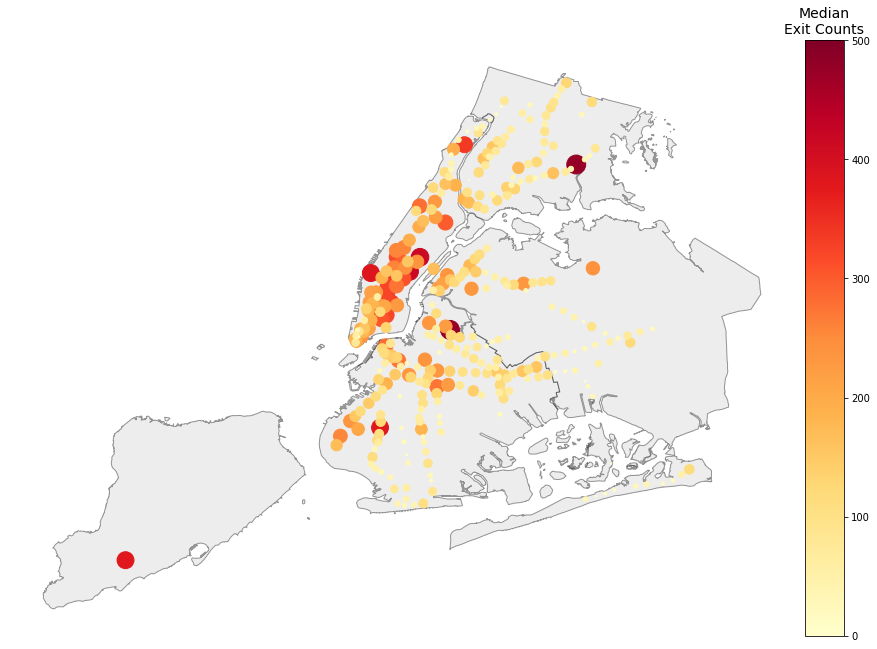

In [760]:
# Zoomed out plot - Morning Exits

ny_boroughs = geopandas.read_file("borough_boundaries.geojson")

ax = ny_boroughs.plot(figsize=(15, 20), alpha=0.4, edgecolor='k',color='lightgrey')

plt.tick_params(labelleft=False,left=False,labelbottom=False,bottom=False)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad='1%')


ax = gdf_am_exit_all.plot(ax=ax,column= gdf_am_exit_all.exit_counts,cmap = 'YlOrRd',\
          legend=True,markersize=(0.75)*(gdf_am_exit_all.exit_counts-gdf_am_exit_all.exit_counts.min()),alpha=1,cax=cax)


# gdf_am_exit_all.plot(ax=ax, color = 'darkviolet',markersize=(1)*gdf_am_exit_all.exit_counts,alpha=1)

plt.title('Median\nExit Counts',fontsize = 14);

sns.despine(top=True,bottom=True,left=True,right=True)

plt.savefig('images/all_am_exit_zoomed_out.png',format='png')

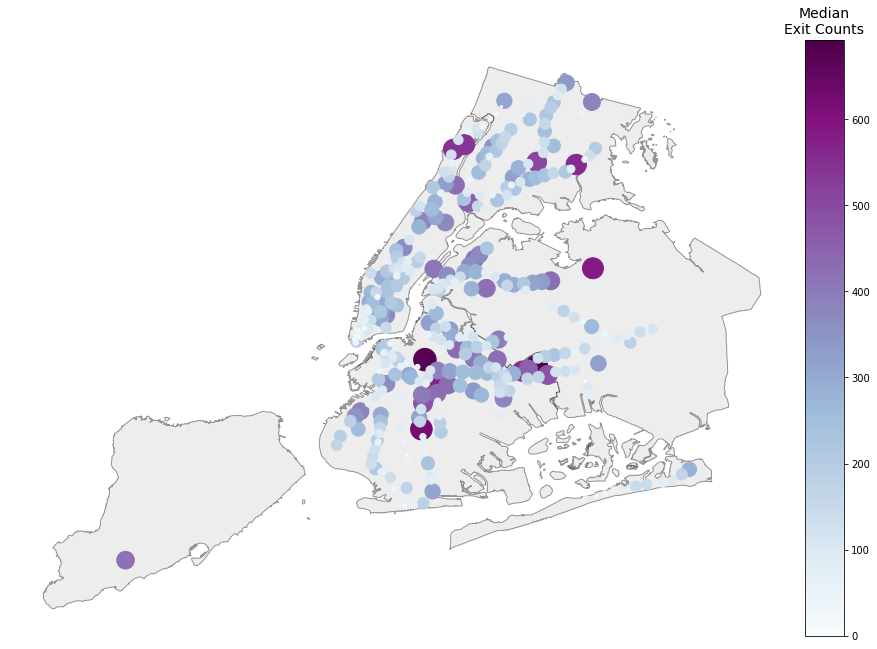

In [762]:
# Zoomed Out Plot - PM Exits

ny_boroughs = geopandas.read_file("borough_boundaries.geojson")

ax = ny_boroughs.plot(figsize=(15,20), alpha=0.4, edgecolor='k',color='lightgrey')


plt.tick_params(labelleft=False,left=False,labelbottom=False,bottom=False)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad='1%')

ax = gdf_pm_exit_all.plot(ax=ax,column= gdf_pm_exit_all.exit_counts,cmap = 'BuPu',\
          legend=True,markersize=(0.75)*(gdf_pm_exit_all.exit_counts-gdf_pm_exit_all.exit_counts.min()),alpha=1,cax=cax)

plt.title('Median\nExit Counts',fontsize = 14);



sns.despine(top=True,bottom=True,left=True,right=True)



plt.savefig('images/all_pm_exit_zoomed_out.png',format='png')

# title, legend, units, etc
#PM EXITS

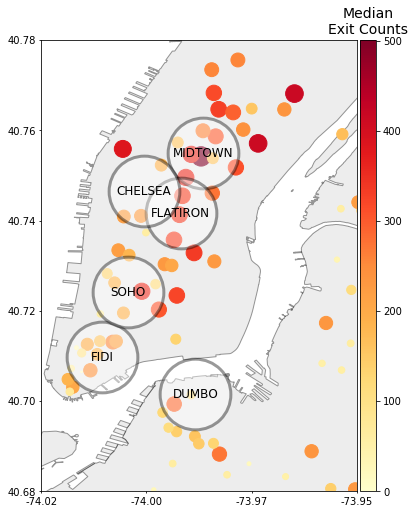

In [763]:
# Zoomed in Plot - AM exits + tech hubs 

ny_boroughs = geopandas.read_file("borough_boundaries.geojson")

ax = ny_boroughs.plot(figsize=(6,9), alpha=0.4, edgecolor='k',color='lightgrey')
plt.axis([-74.02,-73.95,40.68,40.78])

plt.tick_params(labelleft=False,left=False,labelbottom=False,bottom=False)

# ticks_x = np.linspace(-74.02, -73.95, 4)
# plt.xticks(ticks_x);
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.tick_params(length=2)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad='1%')


ax = gdf_am_exit_all.plot(ax=ax,column= gdf_am_exit_all.exit_counts,cmap = 'YlOrRd',\
          legend=True,markersize=(0.75)*(gdf_am_exit_all.exit_counts-gdf_am_exit_all.exit_counts.min()),alpha=1,cax=cax)

plt.title('Median\nExit Counts',fontsize = 14);

ax = gdf_tech.plot(ax=ax, color='white',linewidth = 3,edgecolor='k',markersize=5000,alpha=0.4)

gdf_tech.apply(lambda x: ax.annotate(s=x.neighborhood.upper(), xy=(x.coords[0],x.coords[1]), va='center',ha='center',color='black',fontsize=12,alpha=1),axis=1);


plt.savefig('images/all_am_exit_zoomed_in.png',format='png')


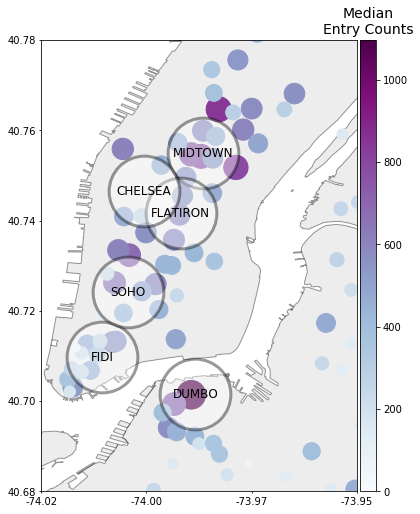

In [764]:
# Zoomed in Plot - PM entries + tech hubs 

ny_boroughs = geopandas.read_file("borough_boundaries.geojson")

ax = ny_boroughs.plot(figsize=(6,9), alpha=0.4, edgecolor='k',color='lightgrey')
plt.axis([-74.02,-73.95,40.68,40.78])

plt.tick_params(labelleft=False,left=False,labelbottom=False,bottom=False)

# ticks_x = np.linspace(-74.02, -73.95, 4)
# plt.xticks(ticks_x);
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.tick_params(length=2)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad='1%')


ax = gdf_pm_entry_all.plot(ax=ax,column= gdf_pm_entry_all.entry_counts,cmap = 'BuPu',\
          legend=True,markersize=(0.75)*(gdf_pm_entry_all.entry_counts-gdf_pm_entry_all.entry_counts.min()),alpha=1,cax=cax)

plt.title('Median\nEntry Counts',fontsize = 14);


ax = gdf_tech.plot(ax=ax, color='white',linewidth = 3,edgecolor='k',markersize=5000,alpha=0.4)

gdf_tech.apply(lambda x: ax.annotate(s=x.neighborhood.upper(), xy=(x.coords[0],x.coords[1]), va='center',ha='center',color='black',fontsize=12,alpha=1),axis=1);


plt.savefig('images/all_pm_entry_zoomed_in.png',format='png')

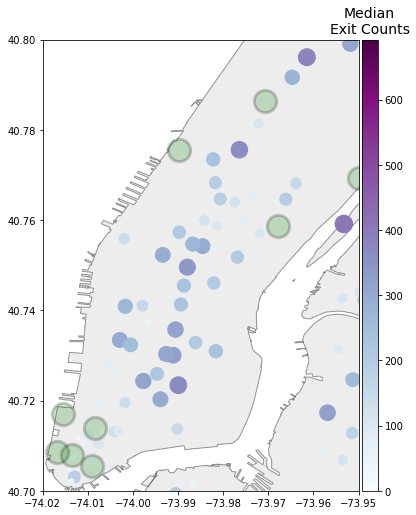

In [765]:
# Zoomed in Plot - PM exits + high income areas 

ny_boroughs = geopandas.read_file("borough_boundaries.geojson")

ax = ny_boroughs.plot(figsize=(6,9), alpha=0.4, edgecolor='k',color='lightgrey')

plt.axis([-74.02,-73.95,40.7,40.8])

plt.tick_params(labelleft=False,left=False,labelbottom=False,bottom=False)


divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad='1%')

ax = gdf_pm_exit_all.plot(ax=ax,column= gdf_pm_exit_all.exit_counts,cmap = 'BuPu',\
          legend=True,markersize=(0.75)*(gdf_pm_exit_all.exit_counts-gdf_pm_exit_all.exit_counts.min()),alpha=1,cax=cax)

plt.title('Median\nExit Counts',fontsize = 14);


ax = gdf_income.plot(ax=ax, color='green',linewidth = 3,edgecolor='k',markersize=500,alpha=0.2)


plt.savefig('images/all_pm_exit_zoomed_in.png',format='png')


## Tables

In [795]:
# See which popular stations are in which tech hubs

gdf_am_exit_all[['station','tech_borough']].head(20)

,station,tech_borough
65,42 ST BRYANT PK,midtown
326,WESTCHESTER SQ E TREMONT AV,outside_tech_hub
213,GRAND ST,outside_tech_hub
89,68 ST HUNTER COLLEGE,midtown
75,51 ST,midtown
57,34 ST 11 AV,chelsea
224,HUGUENOT,outside_tech_hub
74,50 ST,outside_tech_hub
313,TIMES SQ 42 ST,midtown
58,34 ST HERALD SQ,midtown


In [792]:
# Look at top stations side by side
top_stations = pd.DataFrame(list(zip(gdf_am.station[0:30], gdf_pm_entry_all[gdf_pm_entry_all.tech_borough!='outside_tech_hub'].station[0:30])),columns=['AM','PM'])
top_stations


,AM,PM
0,THIRTY THIRD ST,YORK ST
1,42 ST-BRYANT PK,57 ST 7 AV
2,WESTCHESTER SQ,GRAND CENTRAL 42 ST
3,GRAND ST,42 ST BRYANT PK
4,68ST-HUNTER CO,TIMES SQ 42 ST
5,72 ST-2 AVE,HIGH ST
6,51 ST,W 4 ST
7,PATH WTC 2,SPRING ST
8,33 ST-RAWSON ST,7 AV
9,HOYT-SCHER,34 ST 11 AV
